In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
def parser(x):
  return pd.datetime.strptime(x, '%Y-%m-%d')

In [3]:
dataset = pd.read_csv('/content/drive/My Drive/Datasets/birth.csv', header=0, parse_dates=[0], index_col=0, squeeze=False, date_parser=parser)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [4]:
dataset.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [5]:
dataset.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


# Assignment 9

Untuk dataset sales dan birth:

1. Plot dataset yang digunakan

2. Tentukan apakah dataset yang digunakan terdapat **trend dan atau seasonality**!

3. Nilai hyperparameter untuk ARIMA terbaik beserta nilai RMSEnya. Jelaskan untuk masing-masing hyperparameter!

4. Nilai hyperparameter untuk SARIMA terbaik beserta nilai RMSEnya. Jelaskan untuk masing-masing hyperparameter!

5. Bandingkan nilai RMSE tertinggi dari ARIMA & SARIMA, lalu simpulkan!

# No. 1

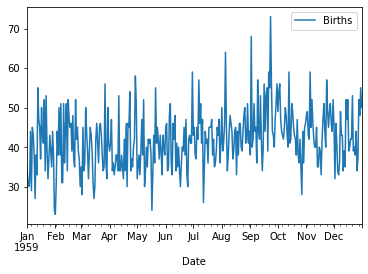

In [ ]:
dataset.plot()
plt.show()

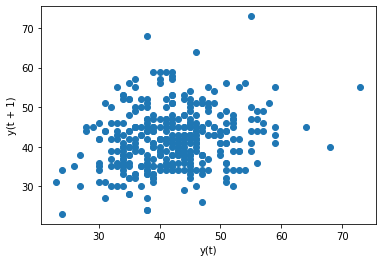

In [ ]:
from pandas.plotting import lag_plot
lag_plot(dataset)
plt.show()

In [ ]:
dataframe = pd.DataFrame()
dataframe['month'] = [dataset.index[i].month for i in range(len(dataset))]
dataframe['day'] = [dataset.index[i].day for i in range(len(dataset))]
dataframe['birth'] = dataset['Births'].values

dataframe.head()

,month,day,birth
0,1,1,35
1,1,2,32
2,1,3,30
3,1,4,31
4,1,5,44


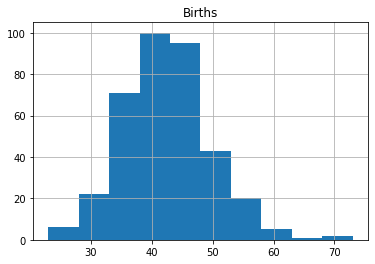

In [ ]:
dataset.hist()
plt.show()

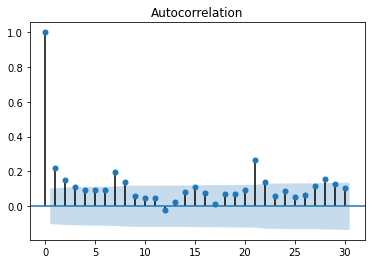

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(dataset, lags=30, ax=plt.gca())
plt.show()

## No. 2
dari dataset yang digunakan (birth.csv) berdasrkan plotting grafik angka kelahiran terhadap waktu tidak terlihhat adanya trend maupun seasonal (no trand and no seasonality)

## No. 3

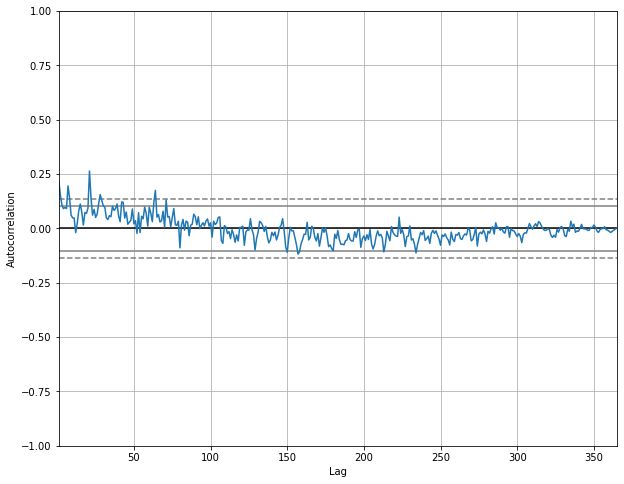

In [ ]:
# melihat grafik auto korelasi dari datset
plt.figure(figsize=(10,8))
pd.plotting.autocorrelation_plot(dataset)
plt.show()

In [7]:
values = dataset.values
size = int(len(values) * 0.66)
train, test = values[0:size], values[size:len(values)]

In [8]:
from statsmodels.tsa.ar_model import AR

model_ar = AR(train)
model_fit = model_ar.fit()
print('Lag: ', model_fit.k_ar)
print('Coefficients: ', model_fit.params)

Lag:  15
Coefficients:  [ 3.85037466e+01  7.60823275e-02  1.67854554e-03 -2.87552181e-02
 -1.76430937e-02  3.31546460e-02  3.25668421e-03  5.84992022e-02
  1.20479557e-01 -7.73202719e-03 -1.00555926e-02 -1.08705189e-02
 -8.40807136e-02 -4.97698971e-02 -5.34584929e-02  2.06271691e-02]


In [9]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [11]:
# mengevaluasi ARIMA model dengan order (p,d,q)
def evaluate_arima_model(X, arima_order):
  # menyiapkan training dataset
  train_size = int(len(X) * 0.66)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  # membuat prediksi
  predictions = []
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # mengkalkulasi sample error
  error = mean_squared_error(test, predictions)
  return error

# mengevaluasi combinasi dari nilai p, d, dan q untuk ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float('inf'), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          mse = evaluate_arima_model(dataset, order)
          if mse < best_score:
            best_score, best_cfg = mse, order
          print('ARIMA%s MSE=%.3f' % (order,mse))
        except:
          continue
  print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
  print('RMSE: ', sqrt(best_score))

In [12]:
import warnings

p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings('ignore')

evaluate_models(values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=67.063
ARIMA(0, 0, 1) MSE=62.165
ARIMA(0, 0, 2) MSE=60.386
ARIMA(0, 1, 0) MSE=84.038
ARIMA(0, 1, 1) MSE=56.653
ARIMA(0, 1, 2) MSE=55.272
ARIMA(0, 2, 0) MSE=246.414
ARIMA(0, 2, 1) MSE=84.659
ARIMA(1, 0, 0) MSE=60.876
ARIMA(1, 0, 1) MSE=57.058
ARIMA(1, 1, 0) MSE=65.928
ARIMA(1, 1, 1) MSE=55.129
ARIMA(1, 1, 2) MSE=55.192
ARIMA(1, 2, 0) MSE=143.755
Best ARIMA(1, 1, 1) MSE=55.129
RMSE:  7.424900109980461


## Kesimpulan:
- hyperparameter ARIMA yang terbaik yaitu: p=1, d=1, q=1 dan rmse=7.42
- dari hasil paramter tersebut dapat dijelaskan bahwa nilai rmse terbaik berada pada lag = 1 yang mana dapt juga dilihat dari grafik autocorrelasi diatas diamana punjak rentang puncak tertingginya berada dikisaran 1 atau diatasnya.
- Darisini juga dapat disimpulkan bahwa semakin tinggi nilai p maka prosesnya juga semakin lama.

# No. 4

In [13]:
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [14]:
# Courtesy of Jason Brownlee of Machine Learning Mastery
# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]

# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1, 2]
	d_params = [0, 1]
	q_params = [0, 1, 2]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, 2]
	D_params = [0, 1]
	Q_params = [0, 1, 2]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models

In [15]:
n_test = 12

# model configs
cfg_list = sarima_configs()

# grid search
scores = grid_search(dataset.values, cfg_list, n_test)
print('done')

# list top 3 configs
for cfg, error in scores[:3]:
  print(cfg, error)

 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 44.844
 > Model[[(0, 0, 0), (0, 0, 1, 0), 'n']] 25.589
 > Model[[(0, 0, 0), (1, 0, 0, 0), 'n']] 8.141
 > Model[[(0, 0, 0), (0, 0, 2, 0), 'n']] 18.100
 > Model[[(0, 0, 0), (1, 0, 1, 0), 'n']] 6.941
 > Model[[(0, 0, 0), (2, 0, 0, 0), 'n']] 7.288
 > Model[[(0, 0, 0), (1, 0, 2, 0), 'n']] 6.763
 > Model[[(0, 0, 0), (2, 0, 1, 0), 'n']] 6.727
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'c']] 7.164
 > Model[[(0, 0, 0), (0, 0, 1, 0), 'c']] 6.893
 > Model[[(0, 0, 0), (2, 0, 2, 0), 'n']] 6.763
 > Model[[(0, 0, 0), (0, 0, 2, 0), 'c']] 6.800
 > Model[[(0, 0, 0), (1, 0, 0, 0), 'c']] 6.829
 > Model[[(0, 0, 0), (1, 0, 1, 0), 'c']] 7.003
 > Model[[(0, 0, 0), (2, 0, 0, 0), 'c']] 6.799
 > Model[[(0, 0, 0), (1, 0, 2, 0), 'c']] 6.875
 > Model[[(0, 0, 0), (2, 0, 1, 0), 'c']] 6.946
 > Model[[(0, 0, 0), (0, 0, 0, 0), 't']] 21.426
 > Model[[(0, 0, 0), (0, 0, 1, 0), 't']] 14.122
 > Model[[(0, 0, 0), (2, 0, 2, 0), 'c']] 6.908
 > Model[[(0, 0, 0), (0, 0, 2, 0), 't']] 11.335
 > Mode

## Kesimpulan:
- Dengan menggunakan SARIMA diperoleh hyperparameter terbaik yaitu:
p=1, d=0, q=2, P=1, D=0, Q=2, m=0 dan tren='t' dengan nilai  rmse=6.30
- Dari hasil tersebut terlihat bahwa parameter tersebut memiliki nilai terbaik dan tren yang diprediksi menunjukkan linear (trend='t') yang berarti prediksi kedepannya bergerak lurus.

# No. 5:
- berdasarkan nilai RMSE maka model dengan SARIMA memiliki nilai yang lebih kecil (akurasi tinggi) dibandingkan ARIMA hal ini juga dapat dilihat dari pla trend data yang linear
- namun walaupun demikian hal ini perlu dilakukan penentuan paramter kembali agar mendapat hasil yang lebih baik